# Spotify Data Exploration with Pandas

## Introduction
In this project, I explored a **Spotify listening history dataset** (provided by the instructor) to practice data wrangling and exploratory data analysis (EDA) using **pandas**. The main objective was to identify listening patterns across artists and genres, and to investigate why certain artists appeared as top-streamed despite different stated preferences.  

## Dataset
The dataset consists of personal Spotify streaming history, exported directly from Spotify. It contains track names, artists, timestamps, and listening duration for each played song.  

## Approach
The analysis focused on:
- Importing and structuring the dataset using pandas  
- Cleaning and preprocessing the data for analysis  
- Exploring listening activity across time and artists  
- Visualizing trends with matplotlib and seaborn  

## **Part 1: Initial loading and exploration**

#### **1.0 Import necessary libraries:**
*pandas, numpy, matplotlib.pyplot (other libraries such as seaborn or plotly are also allowed if you want prettier plots). It might also be a good idea to use **os** for task 2.0*


In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

#### **1.1 Loading the data**
*Load the dataset in the file `streaming_history_0.csv` into a Pandas DataFrame called `df_spotify_0`.*

In [2]:
df_spotify_0 = pd.read_csv("/Users/guro/NMBU_data/DAT200/CA1/spotify_data/streaminghistory0.csv")

#### **1.2 Help function**
*Use the Python command `help` to help you understand how to use the `pd.DataFrame.head` and `pd.DataFrame.tail` methods.*

In [3]:
#help(pd.DataFrame.head)

In [4]:
#help(pd.DataFrame.tail)

#### **1.3 Getting an overview**
*Print the first `five` and last `ten` rows of the dataframe. Have a quick look at which columns are in the dataset.*

In [5]:
# First five rows
df_spotify_0.head()

,endTime,artistName,trackName,msPlayed
0,2022-12-03 02:02,Cigarettes After Sex,Truly,30000.0
1,2022-12-03 02:02,Leonard Cohen,Take This Waltz - Paris Version,8210.0
2,2022-12-06 21:05,Vlad Holiday,So Damn Into You,37895.0
3,2022-12-06 21:05,Lorde,Team,8984.0
4,2022-12-06 21:05,Ariana Grande,Into You,1221.0


In [6]:
# Last ten rows
df_spotify_0.tail(10)

,endTime,artistName,trackName,msPlayed
11949,2023-01-02 20:58,Ariana Grande,six thirty,1699.0
11950,2023-01-02 20:58,Leonard Cohen,Thanks for the Dance,19483.0
11951,2023-01-02 20:59,Des Rocs,Used to the Darkness,185.0
11952,2023-01-02 20:59,Caroline Polachek,Hit Me Where It Hurts,603.0
11953,2023-01-02 20:59,Caroline Polachek,Hit Me Where It Hurts,208.0
11954,2023-01-02 20:59,Kaizers Orchestra,Resistansen,208.0
11955,2023-01-02 20:59,Mr.Kitty,After Dark,101447.0
11956,2023-01-02 20:59,daddy's girl,after dark x sweater weather,301.0
11957,2023-01-02 20:59,daddy's girl,after dark x sweater weather,208.0
11958,2023-01-02 20:59,daddy's girl,after dark x sweater weather,789.0


In [7]:
# Have a look at the columns
print(df_spotify_0.columns, df_spotify_0.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11959 entries, 0 to 11958
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   endTime     11959 non-null  object 
 1   artistName  11959 non-null  object 
 2   trackName   11959 non-null  object 
 3   msPlayed    11959 non-null  float64
dtypes: float64(1), object(3)
memory usage: 373.8+ KB
Index(['endTime', 'artistName', 'trackName', 'msPlayed'], dtype='object') None


#### **1.4 Formatting correctly**
*When working with Pandas, it's very useful to have columns which contains dates in a specific format called datetime*. *This allows for efficient manipulation and analysis of time-series data, such as sorting, filtering by date or time, and resampling for different time periods. Figure out which column(s) would be appropriate to convert to datetime, if any, and if so, perform the conversion to the correct format.*

In [8]:
df_spotify_0["endTime"] = pd.to_datetime(df_spotify_0["endTime"])
print(df_spotify_0["endTime"])

0       2022-12-03 02:02:00
1       2022-12-03 02:02:00
2       2022-12-06 21:05:00
3       2022-12-06 21:05:00
4       2022-12-06 21:05:00
                ...        
11954   2023-01-02 20:59:00
11955   2023-01-02 20:59:00
11956   2023-01-02 20:59:00
11957   2023-01-02 20:59:00
11958   2023-01-02 20:59:00
Name: endTime, Length: 11959, dtype: datetime64[ns]


#### **1.5 Unique artists**
*Find how many unique artists are in the dataset.*


In [9]:
n_artists = df_spotify_0["artistName"].nunique()
print("Unique Artists:", n_artists)

Unique Artists: 495


#### **1.6 Unique songs**
*Find how many unique songs are in the dataset.*

In [10]:
n_songs = df_spotify_0["trackName"].nunique()
print("Unique Songs:", n_songs)

Unique Songs: 1308


### **Part 1: Questions**
**Q1: Which columns are in the dataset?** \
The dataset consists of the columns 'endTime', 'artistName', 'trackName', and 'msPlayed'.


**Q2: What timeframe does the dataset span?** \
The dataset spans from 2022-12-03 02:02:00 to 2023-01-02 20:59:00.

**Q3: How many unique artists are in the dataset?** \
There is 495 unique artists in the dataset.

**Q4: How many unique songs are in the dataset?** \
There is 1308 unique songs in the dataset. 

## **Part 2: Working with all the data**

#### **2.0 Importing all the dataframes**
*In Task 1, you only worked with about a month worth of data. Now, you will work with over a year worth.* 

*In the spotify_data folder, there is more than just one listening record. Load each of the 14 listening records into a dataframe (1 dataframe per listening record), and concatenate them together into one large dataframe named `df`.*

In [11]:
# Load all 1-13 files
dataframes_list = [
    pd.read_csv(f"/Users/guro/NMBU_data/DAT200/CA1/spotify_data/streaminghistory{i}.csv") 
    for i in range(1, 14)
]

# Concatenate all dataframes, as well as df_spotify_0
df = pd.concat([df_spotify_0] + dataframes_list, ignore_index=True)

# Confirm dataframe
df.head()

,endTime,artistName,trackName,msPlayed
0,2022-12-03 02:02:00,Cigarettes After Sex,Truly,30000.0
1,2022-12-03 02:02:00,Leonard Cohen,Take This Waltz - Paris Version,8210.0
2,2022-12-06 21:05:00,Vlad Holiday,So Damn Into You,37895.0
3,2022-12-06 21:05:00,Lorde,Team,8984.0
4,2022-12-06 21:05:00,Ariana Grande,Into You,1221.0


#### **2.1 Sorting by time**
*Datasets often aren't perfect. One example of an issue that could occur is that the time-based data might not be in chronological order. If this were to happen, the rows in your dataframe could be in the wrong order. To ensure this isn't an issue in your dataframe, you should sort the dataframe in chronological order, from oldest to newest.*

In [12]:
# Convert the datetime of dataframe
df["endTime"] = pd.to_datetime(df["endTime"])

# Sort by date
df = df.sort_values(by = "endTime")

# Display head and tail
display(df.head())
display(df.tail())

,endTime,artistName,trackName,msPlayed
0,2022-12-03 02:02:00,Cigarettes After Sex,Truly,30000.0
1,2022-12-03 02:02:00,Leonard Cohen,Take This Waltz - Paris Version,8210.0
2,2022-12-06 21:05:00,Vlad Holiday,So Damn Into You,37895.0
3,2022-12-06 21:05:00,Lorde,Team,8984.0
4,2022-12-06 21:05:00,Ariana Grande,Into You,1221.0


,endTime,artistName,trackName,msPlayed
167435,2023-12-07 21:13:00,Ariana Grande,off the table (with The Weeknd),13448.0
167437,2023-12-07 21:14:00,Leonard Cohen,Thanks for the Dance,9317.0
167436,2023-12-07 21:14:00,Ariana Grande,my hair,23757.0
167438,2023-12-07 21:17:00,The Vaccines,Your Love Is My Favourite Band,14661.0
164529,NaT,The Lumineers,Ophelia,371.0


#### **2.2 Setting a timeframe**
*For this investigation, we are only interested in investigating listening patterns from **2023**. Remove any data not from **2023** from the DataFrame.*

In [13]:
# Set timeframe to 2023, make copy of dataframe for this to keep the full df as well
df_2023 = df[df["endTime"].dt.year == 2023].copy()


# Display head and tail
display(df_2023.head())
display(df_2023.tail())

,endTime,artistName,trackName,msPlayed
10881,2023-01-01 01:17:00,Ariana Grande,7 rings,139.0
10882,2023-01-01 01:17:00,Ariana Grande,7 rings,487.0
10883,2023-01-01 01:17:00,Ariana Grande,positions,417.0
10884,2023-01-01 01:17:00,Peach Pit,Being so Normal,2205.0
10885,2023-01-01 01:17:00,Kelly Clarkson,"Santa, Can’t You Hear Me",278.0


,endTime,artistName,trackName,msPlayed
167429,2023-12-07 21:13:00,Arctic Monkeys,Snap Out Of It,1497.0
167435,2023-12-07 21:13:00,Ariana Grande,off the table (with The Weeknd),13448.0
167437,2023-12-07 21:14:00,Leonard Cohen,Thanks for the Dance,9317.0
167436,2023-12-07 21:14:00,Ariana Grande,my hair,23757.0
167438,2023-12-07 21:17:00,The Vaccines,Your Love Is My Favourite Band,14661.0


#### **2.3 Deleting rows**
*Often in Data Science, you will encounter when a row entry has the value NaN, indicating missing data. These entries can skew your analysis, leading to inaccurate conclusions. For this task, identify and remove any rows in your DataFrame that contain NaN values.* \
*Later in the course, you might encounter other techniques of dealing with missing data, typically reffered to as data imputation. Here, though, you are just supposed to delete the entire rows with missing data.*

In [14]:
# Check how many missing
print(df_2023.isna().sum())

endTime       0
artistName    8
trackName     4
msPlayed      6
dtype: int64


In [15]:
# Drop rows with na
df_2023.dropna(inplace=True)

# Check if removed
print(df_2023.isna().sum())

endTime       0
artistName    0
trackName     0
msPlayed      0
dtype: int64


#### **2.4 Convert from milliseconds to seconds**
*From `msPlayed`, create a new column `secPlayed` with the data converted from milliseconds to seconds. Then delete the column `msPlayed`.*

In [16]:
# Make new column with seconds-data from msPlayed
df_2023["secPlayed"] = df_2023["msPlayed"] / 1000 # Convert to seconds

# Remove msPlayed 
df_2023 = df_2023.drop(columns="msPlayed")

# Check
df_2023.head()

,endTime,artistName,trackName,secPlayed
10881,2023-01-01 01:17:00,Ariana Grande,7 rings,0.139
10882,2023-01-01 01:17:00,Ariana Grande,7 rings,0.487
10883,2023-01-01 01:17:00,Ariana Grande,positions,0.417
10884,2023-01-01 01:17:00,Peach Pit,Being so Normal,2.205
10885,2023-01-01 01:17:00,Kelly Clarkson,"Santa, Can’t You Hear Me",0.278


#### **2.5 Finding top 10 favorite artists**
*Find the top `ten` artists with the highest total play time (in seconds). Plot your findings in a bar graph.* \
*(hint: start by creating a new DataFrame with only `artistName` and your time column. To proceed, you will also likely need the `groupby` command from Pandas.)*

In [17]:
# Make new dataframe
df_artists = df_2023[["artistName", "secPlayed"]]

# Check dataframe
df_artists.head()

,artistName,secPlayed
10881,Ariana Grande,0.139
10882,Ariana Grande,0.487
10883,Ariana Grande,0.417
10884,Peach Pit,2.205
10885,Kelly Clarkson,0.278


In [18]:
# Group by artistName and sum total playtime
top_artists = df_artists.groupby("artistName")["secPlayed"].sum()

# Gather top 10 artists with highest playtime
top_10_artists = top_artists.nlargest(10)

display(top_10_artists.head())
display(top_10_artists.tail())

artistName
Ariana Grande          178996.003
Joji                   137229.562
The Pretty Reckless    110293.430
Cage The Elephant       95587.575
Lana Del Rey            90543.113
Name: secPlayed, dtype: float64

artistName
Greta Van Fleet      88026.405
The Neighbourhood    85673.375
Gorillaz             84858.371
Led Zeppelin         77030.802
Arctic Monkeys       76444.236
Name: secPlayed, dtype: float64

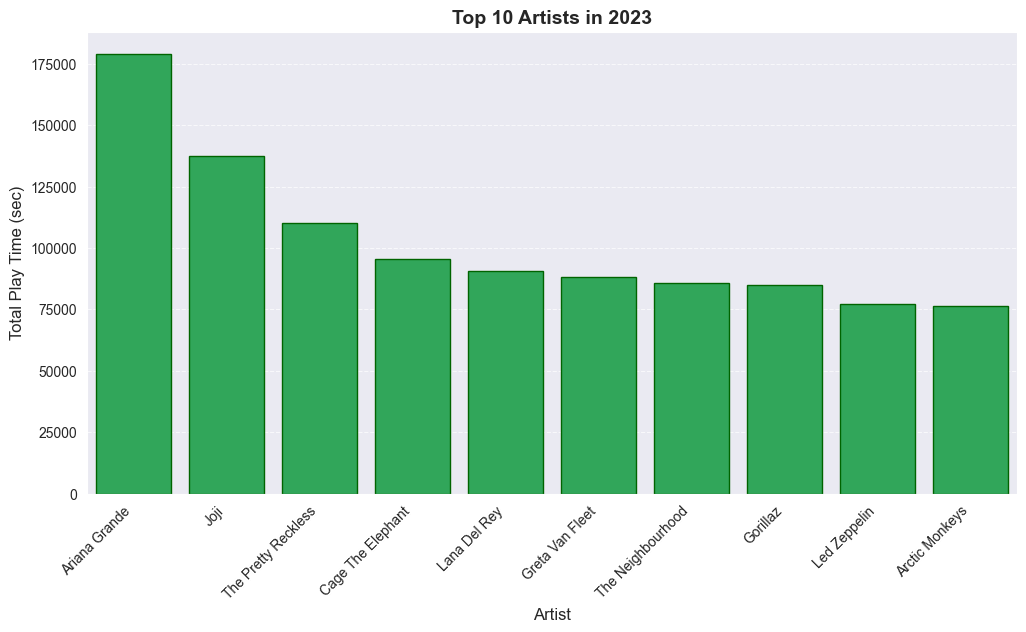

In [19]:
# Setting a Seaborn style for the plots
sns.set_style("darkgrid")

# Plot results using seaborn
plt.figure(figsize=(12,6))
sns.barplot(x = top_10_artists.index, y = top_10_artists.values, color = "#1EB954", edgecolor = "darkgreen") # tried to find a Hex-code similar to the spotify-green

#Title and labels
plt.xlabel("Artist", fontsize = 12)
plt.ylabel("Total Play Time (sec)", fontsize = 12)
plt.title("Top 10 Artists in 2023", fontsize = 14, fontweight = "bold")
plt.xticks(rotation = 45, ha = "right")
plt.grid(axis="y", linestyle="--", alpha = 0.7)
plt.show()

#### **2.6 Finding top 10 favorite songs**
*Find the top `ten` songs with the highest play time. Create a graph visualizing the results.*

In [20]:
# Make new dataframe
df_songs= df_2023[["trackName", "secPlayed"]]

# Check dataframe
df_songs.head()

,trackName,secPlayed
10881,7 rings,0.139
10882,7 rings,0.487
10883,positions,0.417
10884,Being so Normal,2.205
10885,"Santa, Can’t You Hear Me",0.278


In [21]:
# Group by track and sum total playtime
top_songs = df_songs.groupby("trackName")["secPlayed"].sum()

# Gather top 10 artists with highest playtime
top_10_songs = top_songs.nlargest(10)

display(top_10_songs.head())
display(top_10_songs.tail())

trackName
Les                                 31403.364
O Children                          24558.414
When the Levee Breaks - Remaster    22631.721
Heartbeat                           22056.629
Afterthought                        21599.564
Name: secPlayed, dtype: float64

trackName
A Change Is Gonna Come             20414.317
Bones                              18860.916
FEEL.                              18696.637
Bad Ones (feat. Tegan and Sara)    18558.247
Love It If We Made It              17018.248
Name: secPlayed, dtype: float64

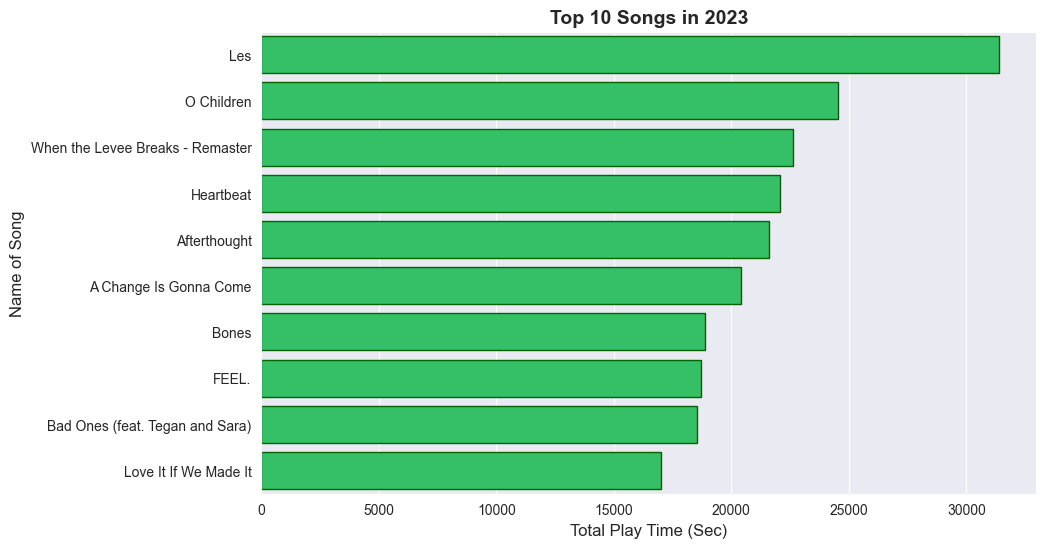

In [22]:
# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(y=top_10_songs.index, x=top_10_songs.values, color="#1ED760", edgecolor="darkgreen")

# Title and labels
plt.title("Top 10 Songs in 2023", fontsize=14, fontweight="bold")
plt.ylabel("Name of Song", fontsize=12)
plt.xlabel("Total Play Time (Sec)", fontsize=12)

# Show plot
plt.show()

## **Part 3: Further analysis**

#### **3.0 Average listening time by hour**
*Generate a plot that displays the average amount of time that music is played for each hour of the day.*

In [23]:
# Extract the hour 
df_2023["hourOfDay"] = df_2023["endTime"].dt.hour

# Group by hour and calculate average play time, and divide by 365
avg_playtime = df_2023.groupby("hourOfDay")["secPlayed"].sum()/365

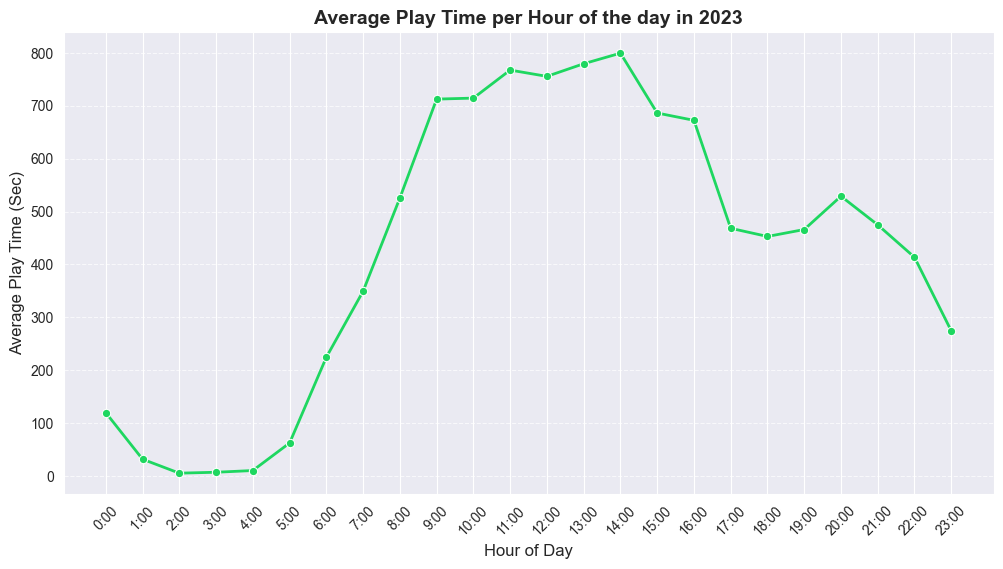

In [24]:
# Plot
plt.figure(figsize = (12, 6))
sns.lineplot(x = avg_playtime.index, y=avg_playtime.values, marker = "o", color="#1ED760", linewidth=2)

# Title and labels
plt.title("Average Play Time per Hour of the day in 2023", fontsize = 14, fontweight = "bold")
plt.xlabel("Hour of Day", fontsize = 12)
plt.ylabel("Average Play Time (Sec)", fontsize = 12)
plt.xticks(range(0, 24), labels = [f"{h}:00" for h in range (0, 24)], rotation = 45)
plt.grid(axis = "y", linestyle = "--", alpha = 0.7)
plt.show()

#### **3.1 Morning music and evening music**
*I think many people find that some types of music are more suitable for morning listening and some music is more suitable for evening listening. Create a plot that compares the play time of the artists Leonard Cohen and Rage Against the Machine on an hour-by-hour basis. See if there are any differences.*

In [25]:
# Filter data for Leonard Cohen and RATM
df_artists = df_2023[df_2023["artistName"].isin(["Leonard Cohen", "Rage Against The Machine"])]

# Group by hour and artist, sum playtime
artists_playtime = df_artists.groupby(["hourOfDay", "artistName"])["secPlayed"].sum().unstack()

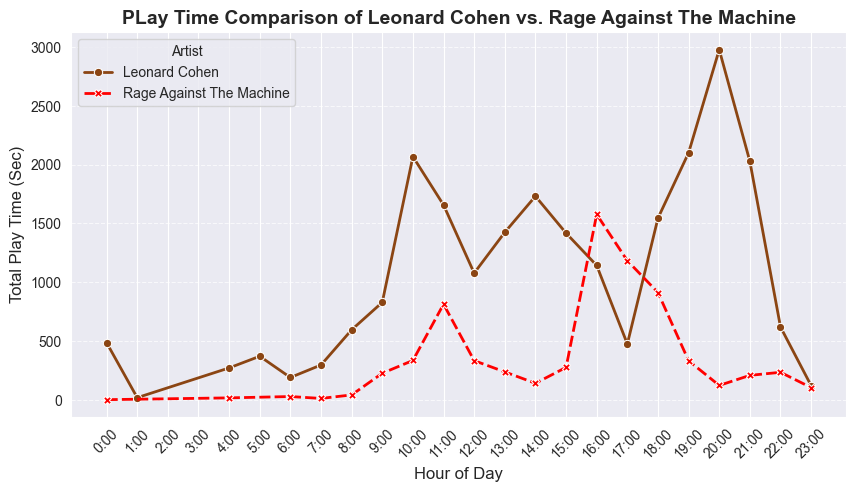

In [26]:
# Set custom colors, Leonard Cohen is kind of grey/brown-ish, and RATM is red
colors_artist = {"Leonard Cohen": "saddlebrown", "Rage Against The Machine": "red"}

# Plot
plt.figure(figsize = (10,5))
sns.lineplot(data=artists_playtime, markers=True, linewidth=2, palette=colors_artist)

# Title & Labels
plt.title("PLay Time Comparison of Leonard Cohen vs. Rage Against The Machine", fontsize = 14, fontweight="bold")
plt.xlabel("Hour of Day", fontsize = 12)
plt.ylabel("Total Play Time (Sec)", fontsize = 12)
plt.xticks(range(0,24),labels = [f"{h}:00" for h in range(0,24)], rotation = 45)
plt.legend(title="Artist")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

#### **3.2 Analysing skipped songs**
*Determining whether a song was skipped or listened to can be challenging. For this analysis, we'll simplify by defining a skipped song as any track played for less than 30 seconds. Conversely, a song played for 30 seconds or more is considered listened to.* \
 *Add a column to your DataFrame to reflect this criteria: set the value to 1 if the song was played for less than 30 seconds (indicating a skipped song), and 0 if it was played for 30 seconds or longer.*

In [27]:
# Make new column for skipped
df_2023["skipped"] = (df_2023["secPlayed"]<30).astype(int)

# Check
print(df_2023[["trackName", "secPlayed", "skipped"]].head())

                      trackName  secPlayed  skipped
10881                   7 rings      0.139        1
10882                   7 rings      0.487        1
10883                 positions      0.417        1
10884           Being so Normal      2.205        1
10885  Santa, Can’t You Hear Me      0.278        1


#### 3.3 Plotting skipped songs
*Create a pie-chart that compares amount of skipped songs to amount of non-skipped songs.*

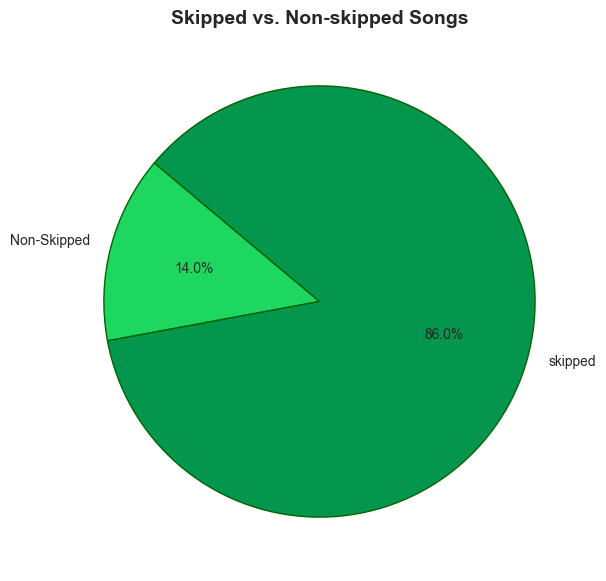

In [28]:
# Counting skipped vs. Listened
n_skip = df_2023["skipped"].value_counts().sort_index()  # Sort by not skipped (0) and skipped (1)

# Create pie chart
plt.figure(figsize=(7, 7))
plt.pie(n_skip, labels=["Non-Skipped", "skipped"], autopct="%1.1f%%", colors=["#1ED760", "#05964e"], startangle=140, wedgeprops={"edgecolor": "darkgreen"})

# Add a title
plt.title("Skipped vs. Non-skipped Songs", fontsize=14, fontweight="bold")

# Show the plot
plt.show()

#### **3.4 Artists by percentage of songs skipped**
*For each artist in the dataset, calculate which percentage of their songs was skipped. Store this information in a new DataFrame called `df_skipped`. Store the percentage of skipped songs in a new column named `SkipRate`*\
\
***Example**: If an artist has **100** songs in your dataset and **25** of these were skipped, the percentage of skipped songs for this artist would be $\frac{25}{100}=25\%$*

In [29]:
# Group by artist and count n of skipped songs
artist_skip = df_2023.groupby("artistName")["skipped"].sum() # Total skipped

# Count total songs played by artist
artist_total_songs = df_2023.groupby("artistName")["skipped"].count()

# Calculate skip rate
df_skipped = pd.DataFrame({
    "TotalSongs": artist_total_songs,
    "SkippedSongs": artist_skip,
    "SkipRate": (artist_skip / artist_total_songs) * 100
})

# Display df
df_skipped_sorted = df_skipped.sort_values(by="SkipRate", ascending=False)
display(df_skipped_sorted)

,TotalSongs,SkippedSongs,SkipRate
artistName,,,
Hannah Montana,54,54,100.000000
Alexander Stewart,47,47,100.000000
No Vacation,2,2,100.000000
G Mills,36,36,100.000000
The Marshall Tucker Band,29,29,100.000000
...,...,...,...
Basstrologe,5,1,20.000000
Wham!,6,1,16.666667
LACES,14,2,14.285714


#### **3.5 Comparing artists by skip-rate**
*Find the `three` top artists with the lowest skip-rate and the `three` with the highest. Print their names, along with their skip-rate.*

In [30]:
# Retrive the three artists with lowest skip rate
lowest_sr = df_skipped_sorted.head(3)

# Retrive the three artists with highest skip rate
highest_sr = df_skipped_sorted.tail(3)

print("Artists with lowest skip rate:")
print(lowest_sr[["SkipRate"]], "\n")
print("Artist with highest skip rate:")
print(highest_sr[["SkipRate"]])

Artists with lowest skip rate:
                   SkipRate
artistName                 
Hannah Montana        100.0
Alexander Stewart     100.0
No Vacation           100.0 

Artist with highest skip rate:
                SkipRate
artistName              
LACES          14.285714
Roc Boyz       11.111111
Gloria Gaynor   0.000000


## **Part 4: God Is a Data Scientist - The Ariana Deep-Dive**

#### **4.0 Ariana-DataFrame:** 
*Create a new DataFrame called df_ariana, containing only rows with music by Ariana Grande.*

In [31]:
# Create copy of dataframe with only Ariana Grande
df_ariana = df_2023[df_2023["artistName"] == "Ariana Grande"].copy()
df_ariana.head()

,endTime,artistName,trackName,secPlayed,hourOfDay,skipped
10881,2023-01-01 01:17:00,Ariana Grande,7 rings,0.139,1,1
10882,2023-01-01 01:17:00,Ariana Grande,7 rings,0.487,1,1
10883,2023-01-01 01:17:00,Ariana Grande,positions,0.417,1,1
10887,2023-01-01 01:17:00,Ariana Grande,Santa Baby,12.293,1,1
10888,2023-01-01 01:17:00,Ariana Grande,Right There (feat. Big Sean),22.929,1,1


#### **4.1 Average skip rate**
*Create a histogram of the distribution of the skip-rate values of the different artists in your DataFrame  `df_skipped`, with skip rates on one axis and number of artists on the other.* \
\
*Then, retrieve the skip rate for Ariana Grande from your DataFrame `df_skipped`. Run the code in the cell below. Where on this distribution does Ariana Grande fall? Do I skip her songs more than average, or less?*

In [32]:
# Retrieve Ariana Grande's skip rate from the existing df_skipped
ariana_skip_rate = df_skipped.loc["Ariana Grande", "SkipRate"]

# Print the result
print(f"Ariana Grande's skip rate: {ariana_skip_rate:.1f}%")

Ariana Grande's skip rate: 99.5%


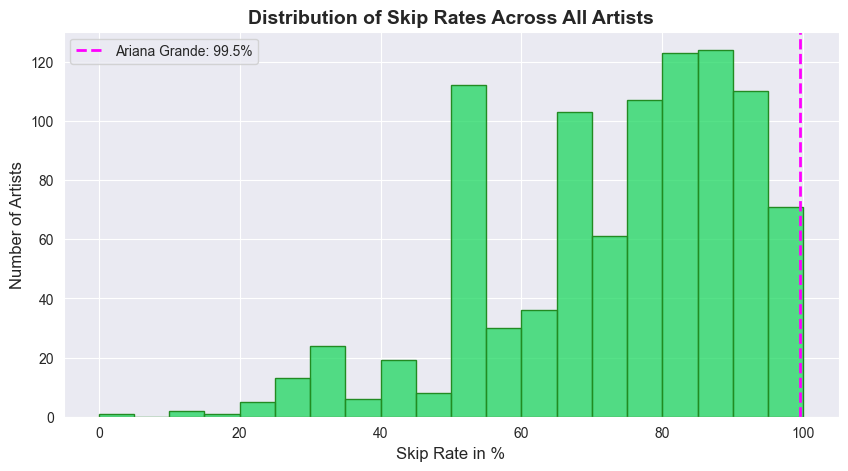

In [33]:
# Create the histogram of skip rates for all artists
plt.figure(figsize=(10, 5))
sns.histplot(df_skipped["SkipRate"], bins=20, color="#1ED760", edgecolor="forestgreen")

# Title and labels
plt.title("Distribution of Skip Rates Across All Artists", fontsize=14, fontweight="bold")
plt.xlabel("Skip Rate in %", fontsize=12)
plt.ylabel("Number of Artists", fontsize=12)

# Retrieve Ariana Grande's skip rate
ariana_skip_rate = df_skipped.loc["Ariana Grande", "SkipRate"]

# Add a vertical line to indicate Ariana Grande's skip rate
plt.axvline(ariana_skip_rate, color="fuchsia", linestyle="--", linewidth=2, label=f"Ariana Grande: {ariana_skip_rate:.1f}%")

# Add legend
plt.legend()

# Show plot
plt.show()

### **Part 4: Questions**

#### **Q1: Did I skip a lot of Ariana Grande's songs, or did I not, compared to the rest of the dataset?**

In [34]:
# Print Ariana Grande's skip rate
print(f"Ariana Grande's skip rate: {ariana_skip_rate:.1f}%")

# Compare the skip rate of Ariana Grande to the average
average_skip_rate = df_skipped["SkipRate"].mean()

if ariana_skip_rate > average_skip_rate:
    print("You skip Ariana Grande more than the average")
elif ariana_skip_rate < average_skip_rate:
    print("You skip Ariana Grande less than the average")
else:
    print("You skip Ariana Grande as much as the average")

Ariana Grande's skip rate: 99.5%
You skip Ariana Grande more than the average


As we can see, Ariana Grande's songs we're skipped more than the average artist in the dataset.

#### **Q2: What might be some possible reasons for Ariana Grande to be my nr.1 artist?**

Ariana Grandes songs might be frequent recommended by Spotifys algorithm or such, leading to a higher play count, even though they are skipped a lot. 